In [ ]:
# Dataset used
# kaggle competitions download -c tabular-playground-series-jan-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('data/train.csv',parse_dates=['date'])
test_data=pd.read_csv('data/test.csv',parse_dates=['date'])
gdp_data = pd.read_csv('data/GDP_data_2015_to_2019_Finland_Norway_Sweden.csv')
gdp_data.set_index('year', inplace=True)
train_data.head(5)

row_id       date  country       store         product  num_sold
0       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911

In [3]:
gdp_data


GDP_Finland  GDP_Norway  GDP_Sweden
year                                     
2015      234.440     385.802     505.104
2016      240.608     368.827     515.655
2017      255.017     398.394     541.019
2018      275.580     437.000     555.455
2019      268.782     405.510     533.880

In [4]:
def smape(y_true, y_pred):
    """SMAPE Loss"""
    return np.mean(np.abs(y_true - y_pred) / (y_true + np.abs(y_pred)) * 200)

In [5]:
train_data['date']=pd.to_datetime(train_data['date'])

test_data['date']=pd.to_datetime(test_data['date'])
# index
train_data.index=train_data['date']
test_data.index=test_data['date']

EDA creadit to: https://www.kaggle.com/code/ambrosm/tpsjan22-01-eda-which-makes-sense

In [6]:
train_data.groupby(['country', 'store', 'product']).num_sold.agg(['min', 'max', 'mean'])

min   max         mean
country store      product                               
Finland KaggleMart Kaggle Hat      210  1113   362.479808
                   Kaggle Mug      126   774   204.200548
                   Kaggle Sticker   70   326   103.044490
        KaggleRama Kaggle Hat      354  1895   628.926762
                   Kaggle Mug      220  1398   356.110883
                   Kaggle Sticker  128   559   180.232033
Norway  KaggleMart Kaggle Hat      335  1809   594.645448
                   Kaggle Mug      201  1113   334.370294
                   Kaggle Sticker  114   518   169.577687
        KaggleRama Kaggle Hat      596  2884  1036.357974
                   Kaggle Mug      366  1935   584.297741
                   Kaggle Sticker  214   874   295.607803
Sweden  KaggleMart Kaggle Hat      248  1207   419.214237
                   Kaggle Mug      149   730   235.885010
                   Kaggle Sticker   86   356   119.613279
        KaggleRama Kaggle Hat      428  2169   731.452430
                   Kaggle Mug      253  1438   411.273101
                   Kaggle Sticker  148   637   208.314853

In [7]:
kk=train_data.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='store')
kk['KaggleRama:KaggleMart']= kk['KaggleRama']/kk['KaggleMart']
kk

store                   KaggleMart   KaggleRama  KaggleRama:KaggleMart
country product                                                       
Finland Kaggle Hat      362.479808   628.926762               1.735067
        Kaggle Mug      204.200548   356.110883               1.743927
        Kaggle Sticker  103.044490   180.232033               1.749070
Norway  Kaggle Hat      594.645448  1036.357974               1.742817
        Kaggle Mug      334.370294   584.297741               1.747457
        Kaggle Sticker  169.577687   295.607803               1.743200
Sweden  Kaggle Hat      419.214237   731.452430               1.744818
        Kaggle Mug      235.885010   411.273101               1.743532
        Kaggle Sticker  119.613279   208.314853               1.741570

Insight: Maybe it suffices to model KaggleMart and multiply all predictions by 1.74 to get the KaggleRama predictions.

In [8]:
# Group by year

kk = train_data.groupby(['country', 'store', 'product', train_data.date.dt.year]).num_sold.mean().unstack(level='product')
kk['Mugs/Sticker'] = kk['Kaggle Mug'] / kk['Kaggle Sticker']
kk['Hats/Sticker'] = kk['Kaggle Hat'] / kk['Kaggle Sticker']
kk

product                   Kaggle Hat  Kaggle Mug  Kaggle Sticker  \
country store      date                                            
Finland KaggleMart 2015   328.947945  185.657534       93.517808   
                   2016   342.773224  192.155738       97.174863   
                   2017   372.758904  210.479452      106.082192   
                   2018   405.493151  228.542466      115.419178   
        KaggleRama 2015   573.260274  322.868493      163.813699   
                   2016   596.931694  335.158470      169.871585   
                   2017   644.789041  367.315068      185.936986   
                   2018   700.813699  399.158904      201.334247   
Norway  KaggleMart 2015   570.076712  320.043836      161.936986   
                   2016   545.489071  306.849727      156.221311   
                   2017   601.043836  337.942466      171.227397   
                   2018   662.106849  372.720548      188.961644   
        KaggleRama 2015   991.465753  556.156164      281.635616   
                   2016   952.767760  538.267760      272.286885   
                   2017  1046.578082  592.904110      299.679452   
                   2018  1154.849315  649.989041      328.893151   
Sweden  KaggleMart 2015   396.342466  222.854795      112.863014   
                   2016   407.322404  227.469945      115.609290   
                   2017   432.728767  244.750685      123.254795   
                   2018   440.495890  248.487671      126.736986   
        KaggleRama 2015   691.939726  388.676712      196.821918   
                   2016   709.106557  399.095628      201.983607   
                   2017   752.857534  423.035616      214.846575   
                   2018   771.967123  434.317808      219.624658   

product                  Mugs/Sticker  Hats/Sticker  
country store      date                              
Finland KaggleMart 2015      1.985264      3.517490  
                   2016      1.977422      3.527386  
                   2017      1.984117      3.513869  
                   2018      1.980108      3.513222  
        KaggleRama 2015      1.970949      3.499465  
                   2016      1.973011      3.514017  
                   2017      1.975481      3.467783  
                   2018      1.982568      3.480847  
Norway  KaggleMart 2015      1.976348      3.520361  
                   2016      1.964199      3.491771  
                   2017      1.973647      3.510208  
                   2018      1.972467      3.503922  
        KaggleRama 2015      1.974737      3.520385  
                   2016      1.976841      3.499132  
                   2017      1.978461      3.492325  
                   2018      1.976292      3.511321  
Sweden  KaggleMart 2015      1.974560      3.511713  
                   2016      1.967575      3.523267  
                   2017      1.985730      3.510847  
                   2018      1.960656      3.475670  
        KaggleRama 2015      1.974763      3.515562  
                   2016      1.975881      3.510713  
                   2017      1.969013      3.504164  
                   2018      1.977546      3.514938

In [9]:
# group by month
kk = train_data.groupby(['country', 'store', 'product', train_data.date.dt.month]).num_sold.mean().unstack(level='product')
kk['Mugs/Sticker'] = kk['Kaggle Mug'] / kk['Kaggle Sticker']
kk['Hats/Sticker'] = kk['Kaggle Hat'] / kk['Kaggle Sticker']
kk

product                  Kaggle Hat  Kaggle Mug  Kaggle Sticker  Mugs/Sticker  \
country store      date                                                         
Finland KaggleMart 1     400.467742  241.822581      107.290323      2.253909   
                   2     393.787611  212.256637       97.557522      2.175708   
                   3     420.282258  200.967742       98.467742      2.040950   
                   4     448.441667  200.558333      105.041667      1.909322   
                   5     422.120968  186.491935      105.459677      1.768372   
...                             ...         ...             ...           ...   
Sweden  KaggleRama 8     592.758065  351.209677      196.532258      1.787033   
                   9     550.825000  377.516667      199.316667      1.894055   
                   10    549.532258  407.137097      200.032258      2.035357   
                   11    600.741667  445.808333      205.083333      2.173791   
                   12    802.024194  546.338710      242.225806      2.255493   

product                  Hats/Sticker  
country store      date                
Finland KaggleMart 1         3.732562  
                   2         4.036466  
                   3         4.268223  
                   4         4.269179  
                   5         4.002676  
...                               ...  
Sweden  KaggleRama 8         3.016085  
                   9         2.763567  
                   10        2.747218  
                   11        2.929256  
                   12        3.311060  

[72 rows x 5 columns]

Products
If we group the data by country, store, product and year, the ratio Sticker:Mug:Hat is always 1:1.97:3.5 and depends neither on country nor on store nor on year. If we group the data by month, however, the ratio is not constant. This implies that the products have different seasonal variations.

Insight: We have to model seasonal effects which depend on the product.

The histograms for every country-store-product combination show that all histograms are skewed. For every product, there are some days with sales far above the mean. For these outliers, predictions will be much less accurate than for the regular days. This is why the competition is scored by Symmetric mean absolute percentage error (SMAPE) rather than MAE or MSE.

Of course, in a competition scored by SMAPE, we have to carefully choose a loss function for training our models. MSE or MAE are not the ideal loss functions here.

Every product's histogram has a slightly different shape. The histograms of the Kaggle Hat looks wider than the histograms of the other two products.

Insight

Choosing a suitable loss function is important.
It may be advantageous to predict log(num_sold) rather than num_sold directly.
We need more analysis to understand why the histograms have different shapes. Maybe it is because of the seasonal variations, maybe there is something else.

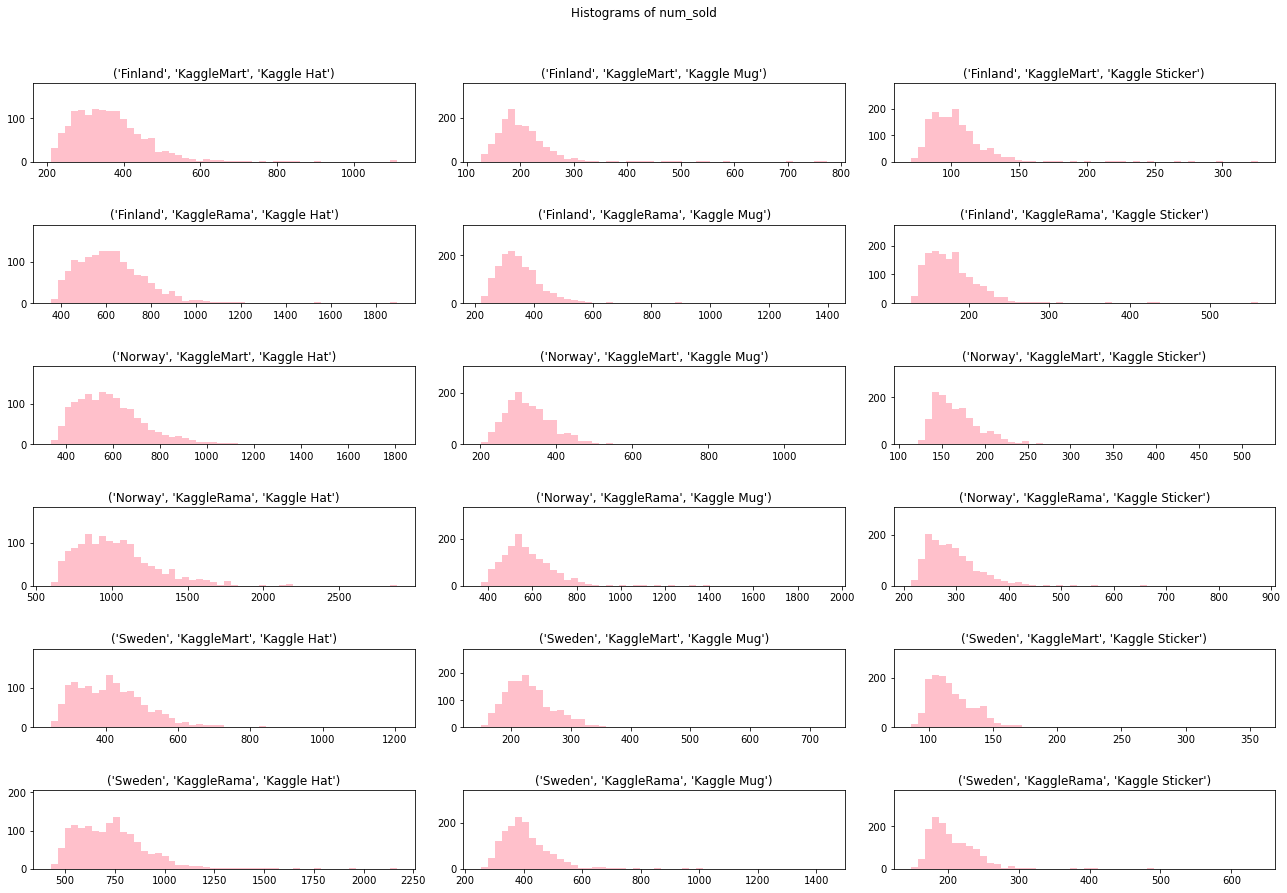

In [10]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train_data.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.hist(df.num_sold, bins=50, color='pink')
    #ax.set_xscale('log')
    ax.set_title(combi)
plt.suptitle('Histograms of num_sold', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

Daily sales end of year peak

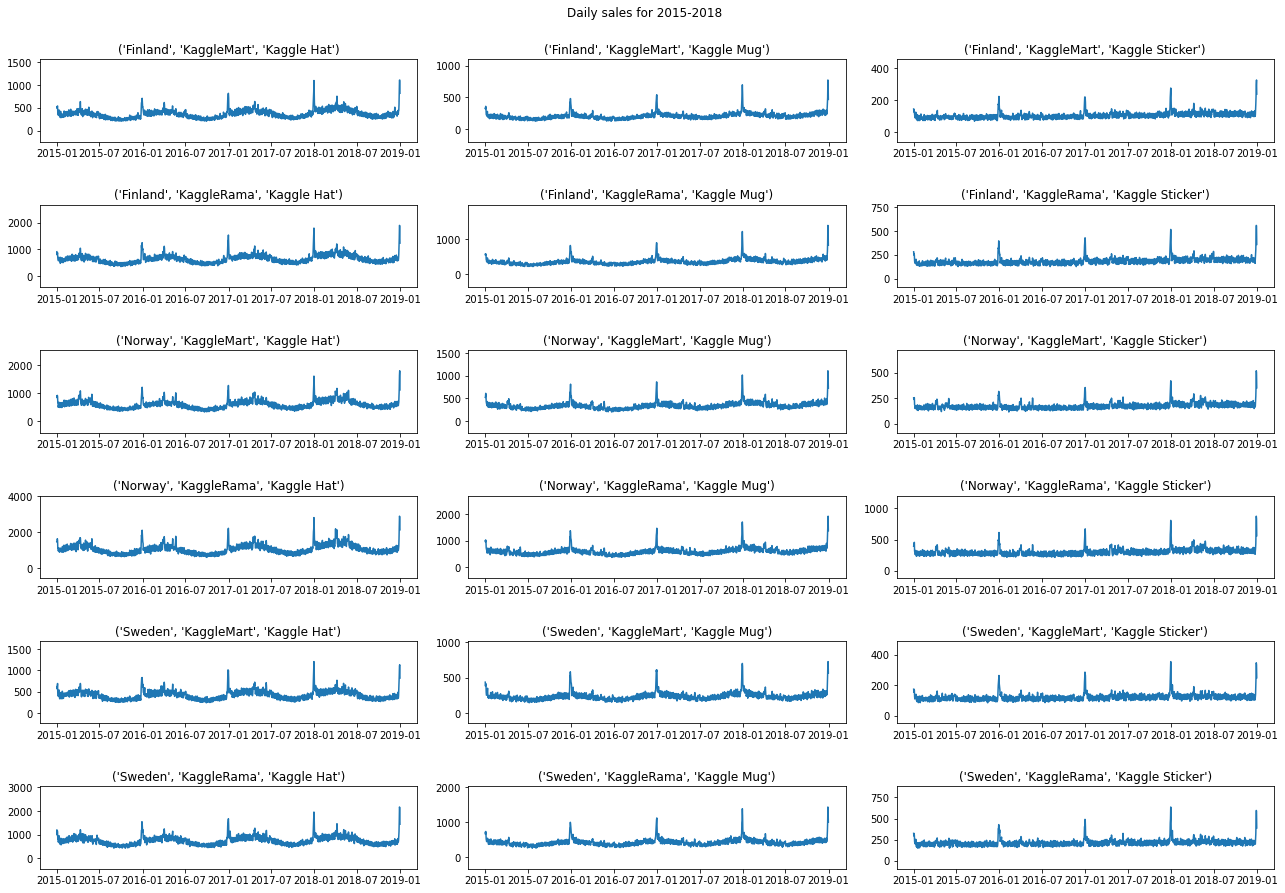

In [11]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train_data.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    #print(df.num_sold.values.shape, df.num_sold.values)
    ax.plot(df.num_sold)
    ax.set_title(combi)
    #if i == 6: break
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for 2015-2018', y=1.03)
plt.show()

lets zoom in december

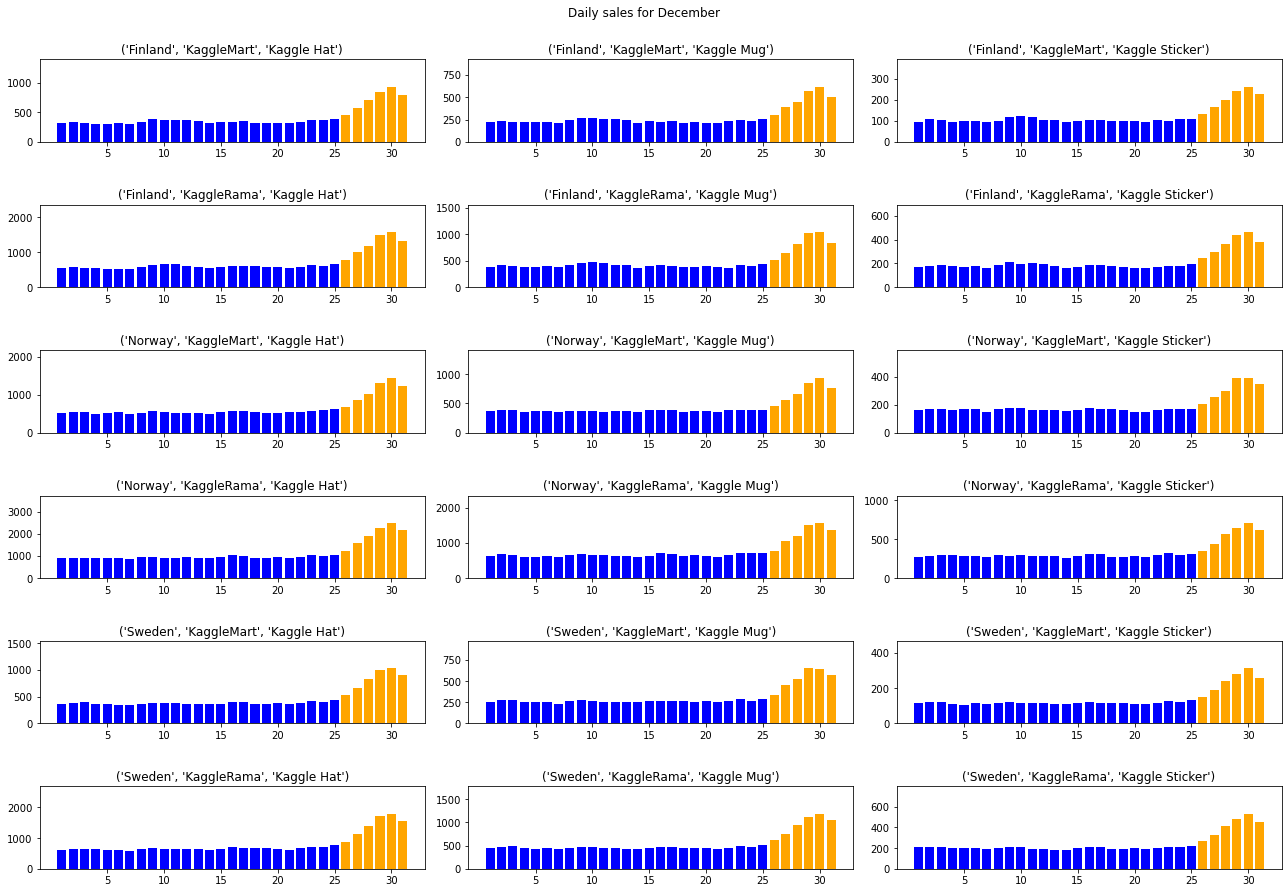

In [12]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train_data.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.bar(range(1, 32),
           df.num_sold[df.date.dt.month==12].groupby(df.date.dt.day).mean(),
           color=['b'] * 25 + ['orange'] * 6)
    ax.set_title(combi)
    ax.set_xticks(ticks=range(5, 31, 5))
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for December', y=1.03)
plt.show()

Monthly sales

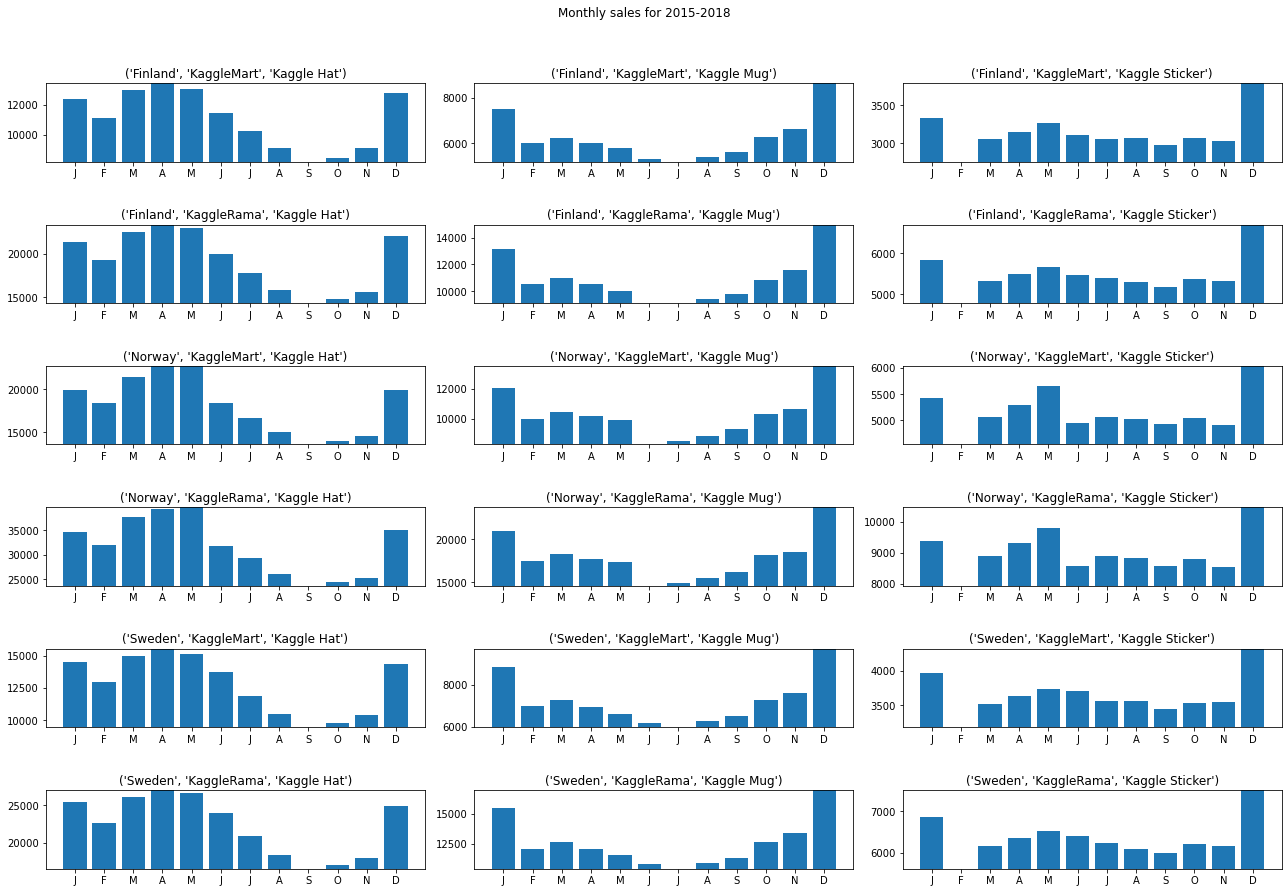

In [13]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train_data.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.resample('MS').sum()
    resampled = resampled.groupby(resampled.index.month).mean()
    ax.bar(range(1, 13), resampled.num_sold)
    ax.set_xticks(ticks=range(1, 13), labels='JFMAMJJASOND')
    ax.set_title(combi)
    ax.set_ylim(resampled.num_sold.min(), resampled.num_sold.max())
plt.suptitle('Monthly sales for 2015-2018', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

Aggregation show the growth trend


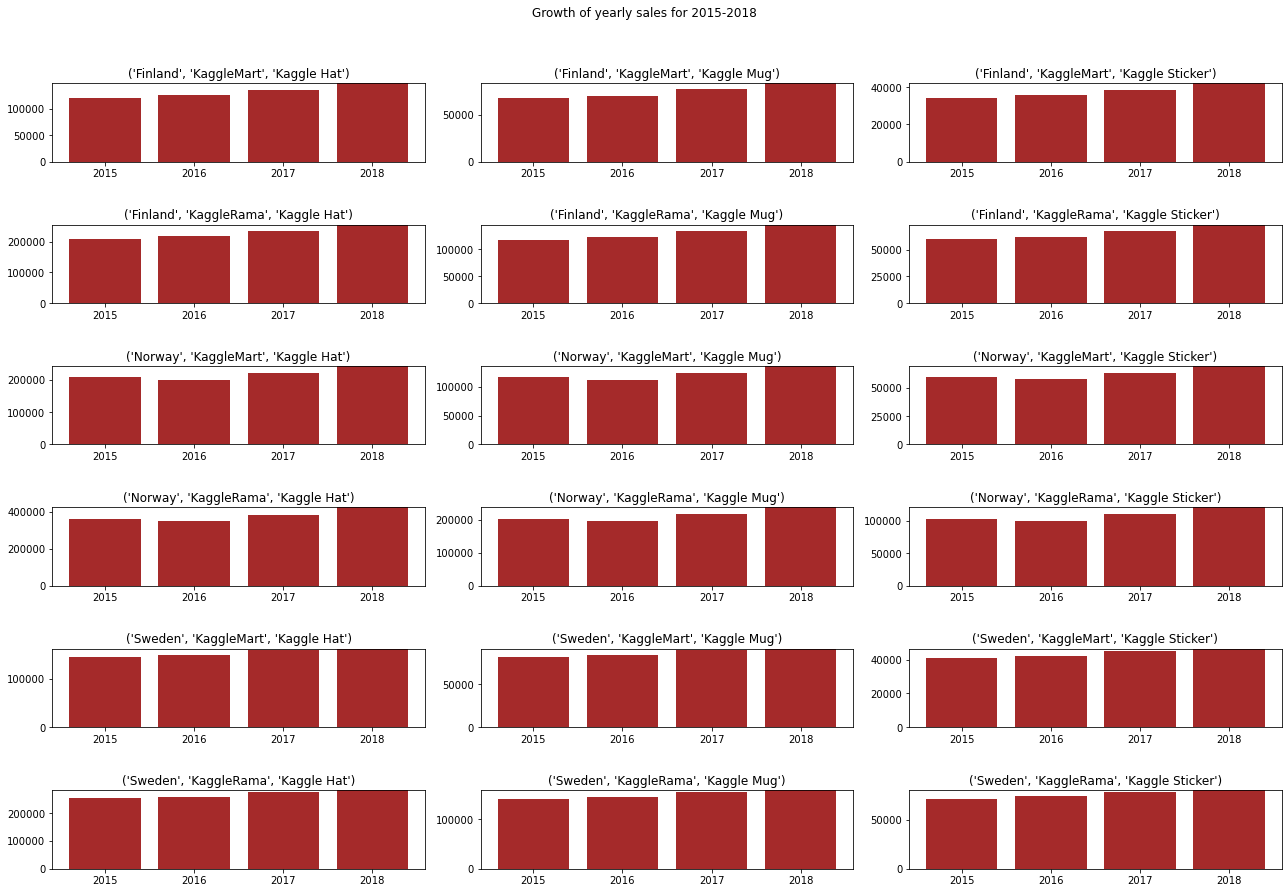

In [14]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train_data.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.resample('AS').sum()
    ax.bar(range(2015, 2019), resampled.num_sold, color='brown')
    ax.set_title(combi)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
    ax.set_ylim(0, resampled.num_sold.max())
plt.suptitle('Growth of yearly sales for 2015-2018', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

In [15]:
train_data

row_id       date  country       store         product  num_sold
date                                                                        
2015-01-01       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329
2015-01-01       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2015-01-01       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
2015-01-01       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572
2015-01-01       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911
...            ...        ...      ...         ...             ...       ...
2018-12-31   26293 2018-12-31   Sweden  KaggleMart      Kaggle Hat       823
2018-12-31   26294 2018-12-31   Sweden  KaggleMart  Kaggle Sticker       250
2018-12-31   26295 2018-12-31   Sweden  KaggleRama      Kaggle Mug      1004
2018-12-31   26296 2018-12-31   Sweden  KaggleRama      Kaggle Hat      1441
2018-12-31   26297 2018-12-31   Sweden  KaggleRama  Kaggle Sticker       388

[26298 rows x 6 columns]

In [76]:
# encoding label
import math
from sklearn.preprocessing import LabelEncoder
import dateutil.easter as easter
gdp_exponent = 1.2121103201489674
def add_features(data):
    data=data.copy()
    def get_gdp(row):
        country = 'GDP_' + row.country
        return gdp_data.loc[row.date.year, country]
    data['gdp'] = data.apply(get_gdp,axis=1)
    # data['dayofmonth']=data['date'].dt.day
    data['month']=data['date'].dt.month
    data['year']=data['date'].dt.year
    # data['dayofweek']=data['date'].dt.dayofweek
    # data['quarter']=data['date'].dt.quarter
    data['dayofyear']=data['date'].dt.dayofyear
    data['is_weekend']=data['date'].dt.weekday.isin([5,6]).astype(int)
    data['store']= LabelEncoder().fit_transform(data['store'])
    data['country']= LabelEncoder().fit_transform(data['country'])
    data['product']= LabelEncoder().fit_transform(data['product'])   
    # data['is_holiday']=data['date'].isin(holidays).astype(int)
    # data['is_month_end']=data['date'].dt.day.isin([26,27,28,29,30,31]).astype(int)
    easter_date = data.date.apply(lambda date: pd.Timestamp(easter.easter(date.year)))
    data['days_from_easter'] = (data.date - easter_date).dt.days.clip(-5, 65)
    # Last Sunday of May (Mother's Day)
    sun_may_date = data.date.dt.year.map({2015: pd.Timestamp(('2015-5-31')),
                                         2016: pd.Timestamp(('2016-5-29')),
                                         2017: pd.Timestamp(('2017-5-28')),
                                         2018: pd.Timestamp(('2018-5-27')),
                                         2019: pd.Timestamp(('2019-5-26'))})
    #new_df['days_from_sun_may'] = (df.date - sun_may_date).dt.days.clip(-1, 9)
    
    # Last Wednesday of June
    wed_june_date = data.date.dt.year.map({2015: pd.Timestamp(('2015-06-24')),
                                         2016: pd.Timestamp(('2016-06-29')),
                                         2017: pd.Timestamp(('2017-06-28')),
                                         2018: pd.Timestamp(('2018-06-27')),
                                         2019: pd.Timestamp(('2019-06-26'))})
    data['days_from_wed_jun'] = (data.date- wed_june_date).dt.days.clip(-5, 5)
    
    # First Sunday of November (second Sunday is Father's Day)
    sun_nov_date = data.date.dt.year.map({2015: pd.Timestamp(('2015-11-1')),
                                         2016: pd.Timestamp(('2016-11-6')),
                                         2017: pd.Timestamp(('2017-11-5')),
                                         2018: pd.Timestamp(('2018-11-4')),
                                         2019: pd.Timestamp(('2019-11-3'))})
    data['days_from_sun_nov'] = (data.date - sun_nov_date).dt.days.clip(-1, 9)
    
   

    data.drop(['date','row_id'], axis=1, inplace=True)

    return data

train=add_features(train_data)
test=add_features(test_data)
train['target']=np.log1p(train['num_sold'])
features=test.columns
print(features)


Index(['country', 'store', 'product', 'gdp', 'month', 'year', 'dayofyear',
       'is_weekend', 'days_from_easter', 'days_from_wed_jun',
       'days_from_sun_nov'],
      dtype='object')


In [18]:
# Huber Regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(train.drop(['num_sold'], axis=1), train['num_sold'], test_size=0.2, random_state=42)
ridgereg = HuberRegressor( alpha=200,max_iter=10000)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print('Ridge Regression MSE:', mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print('Ridge Regression SMAPE:', smape(np.expm1(y_test), np.expm1(y_pred)))
# RMSE
print('Ridge Regression RMSE:', np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1( y_pred))))

Ridge Regression MSE: 16635.644007724582
Ridge Regression SMAPE: 19.618100177874325
Ridge Regression RMSE: 128.9792386693478


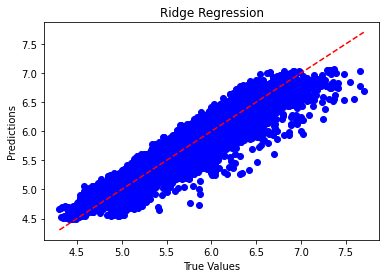

In [19]:
# plot predicted regression line
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')
plt.show()



In [20]:
test_pred = ridgereg.predict(test)
test_pred = np.expm1(test_pred)
submission = pd.DataFrame({'row_id': test_data['row_id'], 'num_sold': test_pred})
submission.to_csv('submission.csv', index=False)


In [21]:
# lightgbm
from lightgbm import LGBMRegressor
# MAE objective function
lgbm = LGBMRegressor(n_estimators=400, learning_rate=0.1, num_leaves=42,objective='regression',metric='mae',random_state=42)
lgbm.fit(X_train, y_train,eval_set=[(X_test, y_test)], eval_metric='mae', early_stopping_rounds=100,verbose=-1)
y_pred = lgbm.predict(X_test)
print('LGBM Regression MAE:', mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print('LGBM Regression SMAPE:', smape(np.expm1(y_test), np.expm1(y_pred)))
    # RMSE
print('LGBM Regression RMSE:', np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

LGBM Regression MAE: 701.9237779003172
LGBM Regression SMAPE: 4.329457002051737
LGBM Regression RMSE: 26.4938441510536


In [22]:
test_pred = lgbm.predict(test)
test_pred = np.expm1(test_pred)
submission = pd.DataFrame({'row_id': test_data['row_id'], 'num_sold': test_pred})
submission.to_csv('submission.csv', index=False)


In [72]:
# Kfold cross validation
import lightgbm
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
smape_score=0
rmse=0
mae=0
pred_test=np.zeros(test.shape[0])
params={'n_estimators':300, 'learning_rate':0.1, 'num_leaves':32,'objective':'regression','metric':'mae','force_row_wise': True,
      
         'feature_fraction': 0.5503386130877996, 
          'bagging_fraction':0.6049919886669951, 
        
                         'random_state':42}
for train_index, test_index in tscv.split(train):
    X_train, X_test, y_train, y_test = train.iloc[train_index], train.iloc[test_index], train['target'].iloc[train_index], train['target'].iloc[test_index]
    X_train_fr=X_train[features]
    X_test_fr= X_test[features]
    train_dataset=lightgbm.Dataset(X_train_fr, y_train,categorical_feature=['country','product','store'])
    test_dataset=lightgbm.Dataset(X_test_fr, y_test,categorical_feature=['country','product','store'])
    lgbm = lightgbm.train(params, train_dataset, num_boost_round=200, valid_sets=[test_dataset], verbose_eval=100, early_stopping_rounds=100,categorical_feature=['country','product','store'])

    y_pred = lgbm.predict(X_test_fr)
    smape_score+=smape(X_test['num_sold'], np.expm1(y_pred))
    rmse+=np.sqrt(mean_squared_error(X_test['num_sold'], np.expm1(y_pred)))
    mae+=mean_squared_error(X_test['num_sold'], np.expm1(y_pred))
    y_pred_test = lgbm.predict(test[features])
    pred_test+=np.expm1(y_pred_test)
pred_test/=5
print('LGBM Regression MAE:', mae/5)
print('LGBM Regression SMAPE:', smape_score/5)
# RMSE
print('LGBM Regression RMSE:', rmse/5)
submission = pd.DataFrame({'row_id': test_data['row_id'], 'num_sold': pred_test})
submission['num_sold']=submission['num_sold'].apply(np.ceil)
submission.to_csv('submission.csv', index=False)



[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 4383, number of used features: 8
[LightGBM] [Info] Start training from score 5.706928
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 0.0997812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's l1: 0.0987255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu